### **Getting the .zip From the Drive**

In [1]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
downloaded = drive.CreateFile({'id': '1NYRCwSqztlMXDluPEWVLgPxBSgMSZ_SE'})
!mkdir data
downloaded.GetContentFile("datafile.zip") # Download archive.zip
# https://drive.google.com/file/d/1NYRCwSqztlMXDluPEWVLgPxBSgMSZ_SE

In [5]:
!unzip -q datafile.zip  -d data
print("Unzip done")

Unzip done


### **Import all Libraries Here**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

from sklearn.metrics import confusion_matrix

### **Reading the data**

In [11]:
path = "data/myData"  # folder with all the class folders
labelFile = 'data/labels/labels.csv'  # file with all names of classes

In [12]:
data = pd.read_csv(labelFile)
data.head()

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [13]:
# Importing the Images
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected: ", len(myList))
numClasses = len(myList)
print("Importing Classes......")
for i in range(0, len(myList)):
    picture = os.listdir(path + "/" + str(count))
    for y in picture:
        currImg = cv2.imread(path + "/" + str(count) + "/" + y);
        images.append(currImg)
        classNo.append(count)
    print(count, end=" ")
    count += 1
print(" ")
images = np.array(images)
classNo = np.array(classNo)
print(len(images))

Total Classes Detected:  43
Importing Classes......
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  
34799


In [14]:
labels = {0:'Speed limit(20km/h)',
          1:'Speed limit(30km/h)',
          2:'Speed limit(50km/h)',
          3:'Speed limit(60km/h)',
          4:'Speed limit(70km/h)',
          5:'Speed limit(80km/h)',
          6:'End of speed limit(80km/h)',
          7:'Speed limit(100km/h)',
          8:'Speed limit(120km/h)',
          9:'No passing',
          10:'No passing for vehicles over 3.5 metric tons',
          11:'Right-of-way at the next intersection',
          12:'Priority road',
          13:'Yield',
          14:'Stop',
          15:'No vehicles',
          16:'Vehicles over 3.5 metric tons prohibted',
          17:'No entry',
          18:'General caution',
          19:'Dangerous curve to the left',
          20:'Dangerous curve to the right',
          21:'Double curve',
          22:'Bumpy road',
          23:'Slippery road',
          24:'Road narrows on the right',
          25:'Road work',
          26:'Traffic signals',
          27:'Pedestrians',
          28:'Children crossing',
          29:'Bicycles crossing',
          30:'Beware of ice/snow',
          31:'Wild animals crossing',
          32:'End of all speed and passing limits',
          33:'Turn right ahead',
          34:'Turn left ahead',
          35:'Ahead only',
          36:'Go straight or right',
          37:'Go straight or left',
          38:'Keep right',
          39:'Keep left',
          40:'Roundabout mandatory',
          41:'End of no passing',
          42:'End of no passing by vehicles over 3.5 metric tons'}

In [15]:
# Splitting the test and train data
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=0.3)  # Note: test more sizes later when model is built
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3)

In [16]:
# printing out to see if sizes match
print("Data Shapes")
print("Train:")
print(X_train.shape, y_train.shape)
print("Validation")
print(X_validation.shape, y_validation.shape)
print("Test")
print(X_test.shape, y_test.shape)

Data Shapes
Train:
(17051, 32, 32, 3) (17051,)
Validation
(7308, 32, 32, 3) (7308,)
Test
(10440, 32, 32, 3) (10440,)


<function matplotlib.pyplot.show(close=None, block=None)>

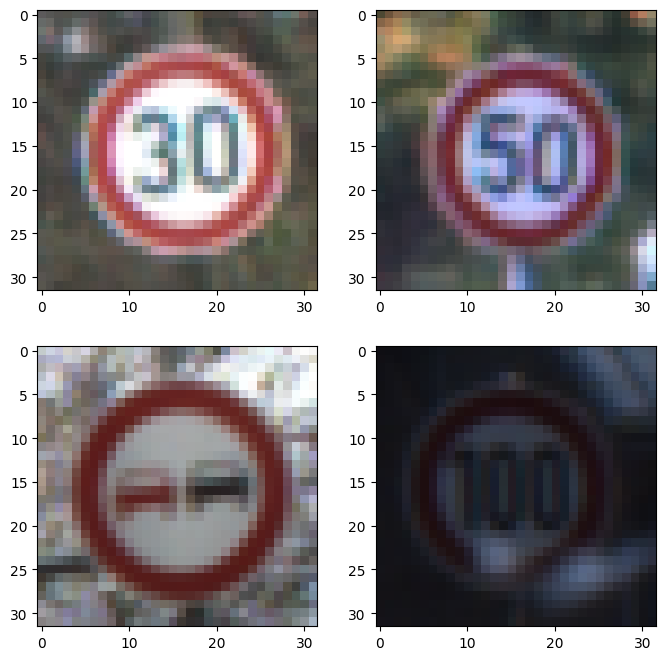

In [17]:
rand_img = random.sample(range(len(X_test)), 4)
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.ravel()
for i in range(4):
    # Plot the image
    axs[i].imshow(X_test[rand_img[i]], cmap=plt.cm.binary)

plt.show

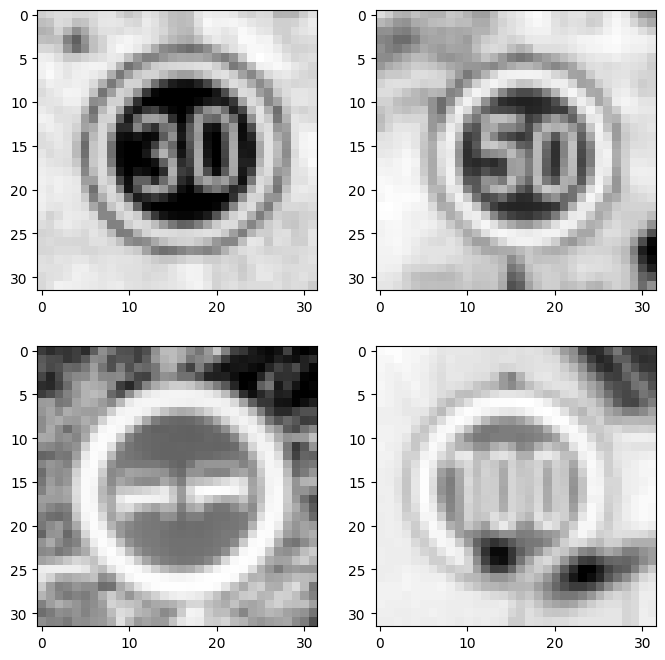

In [18]:
# Graysacle Sample
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.ravel()
for i in range(4):
    # Plot the image
    axs[i].imshow(cv2.cvtColor(X_test[rand_img[i]], cv2.COLOR_BGR2GRAY), cmap=plt.cm.binary)

plt.show()

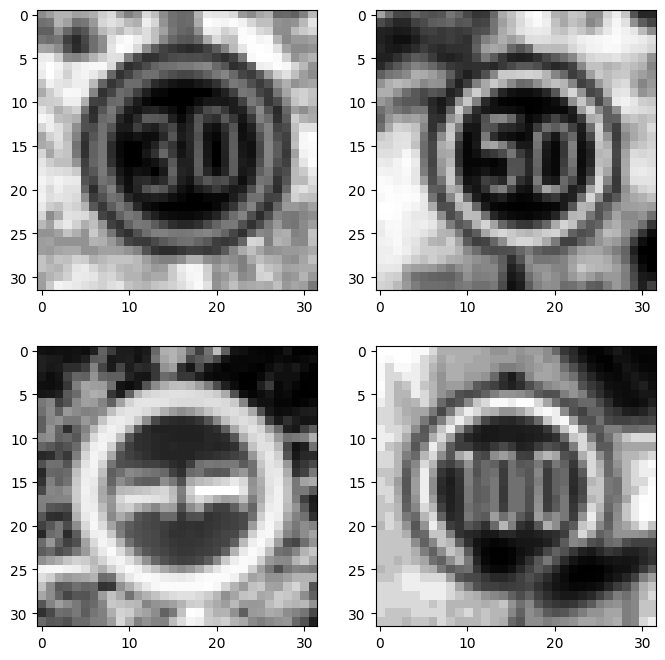

In [19]:
# Equalize Hist Sample
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.ravel()
for i in range(4):
    # Convert to grayscale
    gray_img = cv2.cvtColor(X_test[rand_img[i]], cv2.COLOR_RGB2GRAY)
    # Perform histogram equalization
    eq_img = cv2.equalizeHist(gray_img)
    # Plot the equalized image
    axs[i].imshow(eq_img, cmap=plt.cm.binary)
    # axs[i].axis('off')  # remove axis
    # axs[i].set_title('Equalized Image')  # add title

plt.show()

----------------------------------
[85, 958, 974, 621, 836, 804, 176, 650, 631, 656, 897, 564, 927, 948, 331, 267, 187, 435, 529, 74, 131, 146, 147, 223, 129, 678, 264, 99, 239, 112, 198, 348, 115, 314, 164, 561, 159, 86, 887, 129, 158, 99, 115]


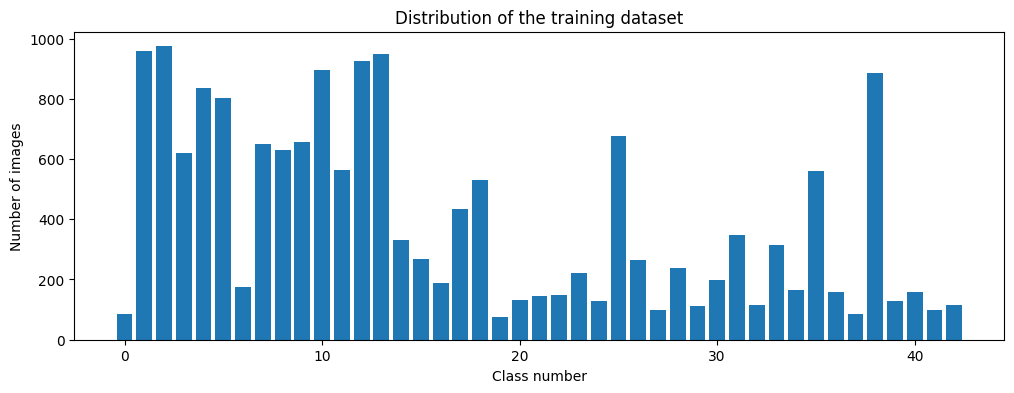

In [20]:
# Print sample and distribution of training
numSample = []
cols = 5
num_classes = numClasses
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        if i == 0: #dont know what this is actually doing. research it
            numSample.append(len(x_selected))

print("----------------------------------")
print(numSample)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), numSample)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

### **Data Preprocessing**

In [21]:
# Preprocessing data
def preprocessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img / 255
    return img

In [22]:
X_train=np.array(list(map(preprocessing,X_train)))
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

In [23]:
# Adding a depth to the dataset
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [24]:
# Augmenting the data and increasing size of set
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1)
dataGen.fit(X_train)
batches = dataGen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

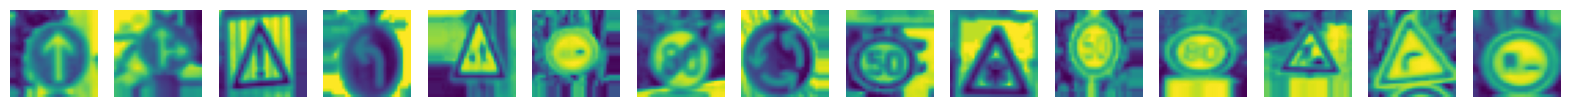

In [25]:
# Display Augmented Samples
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis('off')
plt.show()
# print()

In [26]:
# One Hot Encoding
y_train = to_categorical(y_train, numClasses)
y_validation = to_categorical(y_validation, numClasses)
y_test = to_categorical(y_test, numClasses)

### **LeNet Model**

In [27]:
def myModelLeNetArch():
    size_of_Filter = (5, 5)
    size_of_Filter2 = (3, 3)
    size_of_pool = (2, 2)  
    no_Of_Nodes = 50  
    
    model = Sequential()
    model.add((Conv2D(60, size_of_Filter, input_shape=(32, 32, 1),
                      activation='relu')))  
    model.add((Conv2D(60, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))

    model.add((Conv2D(60 // 2, size_of_Filter2, activation='relu')))
    model.add((Conv2D(60 // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(no_Of_Nodes, activation='relu')) # Hidden Layer
    model.add(Dropout(0.5)) 
    model.add(Dense(numClasses, activation='softmax'))  # Output Layer
    # Compile Model
    model_optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer = model_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [28]:
# Training The Model
model = myModelLeNetArch()
print(model.summary())
history = model.fit(dataGen.flow(X_train, y_train),
                              epochs=10,
                              validation_data=(X_validation, y_validation))

/root/Python/env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1726416857.100086    6779 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-15 12:14:17.104830: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 30)       │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        24,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,223 (555.56 KB)

 Trainable params: 142,223 (555.56 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10


/root/Python/env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


533/533 ━━━━━━━━━━━━━━━━━━━━ 60s 108ms/step - accuracy: 0.0505 - loss: 3.6008 - val_accuracy: 0.3398 - val_loss: 2.5078
Epoch 2/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 55s 102ms/step - accuracy: 0.2676 - loss: 2.5954 - val_accuracy: 0.5906 - val_loss: 1.3262
Epoch 3/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 53s 99ms/step - accuracy: 0.4303 - loss: 1.8256 - val_accuracy: 0.6973 - val_loss: 0.9938
Epoch 4/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 53s 99ms/step - accuracy: 0.5141 - loss: 1.5237 - val_accuracy: 0.7585 - val_loss: 0.7623
Epoch 5/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 53s 99ms/step - accuracy: 0.5814 - loss: 1.2935 - val_accuracy: 0.8325 - val_loss: 0.5650
Epoch 6/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 52s 98ms/step - accuracy: 0.6198 - loss: 1.1532 - val_accuracy: 0.8710 - val_loss: 0.4593
Epoch 7/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 51s 95ms/step - accuracy: 0.6764 - loss: 1.0187 - val_accuracy: 0.8998 - val_loss: 0.3501
Epoch 8/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 51s 96ms/step - accuracy: 0.7019 - loss: 0.9148 - val_accur

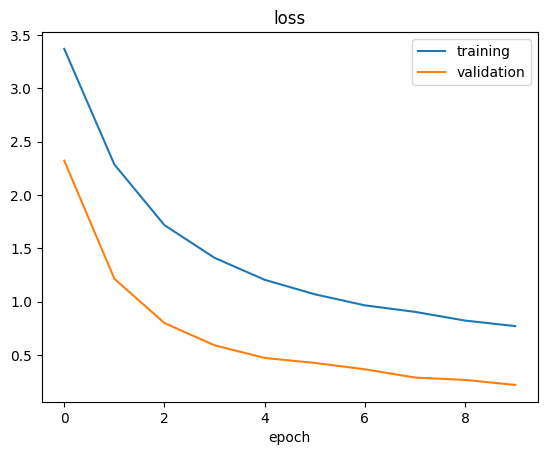

In [31]:
# Plotting results
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.show()

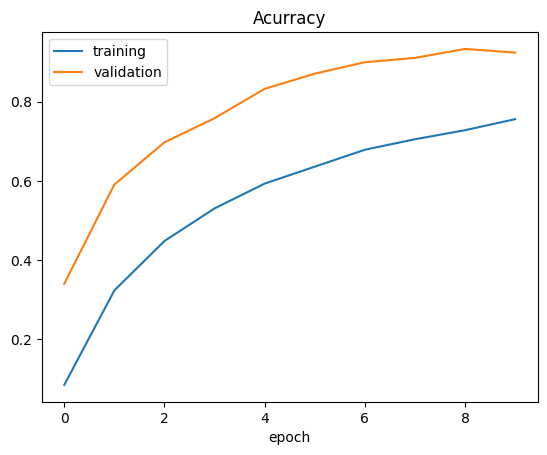

In [29]:
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

In [30]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

Test Score: 0.2323693335056305
Test Accuracy: 0.9257662892341614


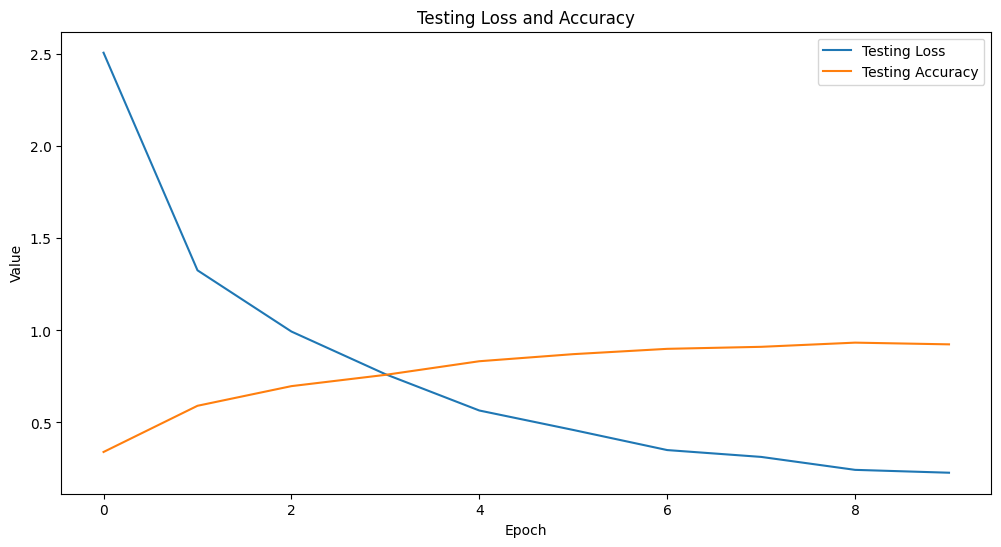

In [31]:
# Plot the testing loss and accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Testing Loss and Accuracy')
plt.legend()
plt.show()

### **Model 2 CNN playing with someone else's model. Want to see if I can whip up a new model**



In [32]:
def myModelCNN():
  model = Sequential()
  model.add(Conv2D(filters = 32, kernel_size=(5,5), activation="relu", input_shape = X_train.shape[1:]))
  model.add((Conv2D(filters=32, kernel_size=(5,5), activation="relu")))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.25))
  model.add((Conv2D(filters=64,kernel_size=(3,3),activation="relu"))) 
  model.add((MaxPooling2D(pool_size=(2,2))))
  model.add(Dropout(rate=0.25))
  model.add(Flatten()) 
  model.add(Dense(256, activation="relu"))
  model.add(Dropout(rate=0.40))
  model.add(Dense(43, activation="softmax")) 
  model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [33]:
# Training The Model
model = myModelCNN()
print(model.summary())
history = model.fit(dataGen.flow(X_train, y_train),
                              epochs=20,
                              validation_data=(X_validation, y_validation))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465,867 (1.78 MB)

 Trainable params: 465,867 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
533/533 ━━━━━━━━━━━━━━━━━━━━ 30s 54ms/step - accuracy: 0.1503 - loss: 3.1774 - val_accuracy: 0.7226 - val_loss: 0.9794
Epoch 2/20
533/533 ━━━━━━━━━━━━━━━━━━━━ 28s 53ms/step - accuracy: 0.5721 - loss: 1.3941 - val_accuracy: 0.9052 - val_loss: 0.3959
Epoch 3/20
533/533 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.7282 - loss: 0.8705 - val_accuracy: 0.9455 - val_loss: 0.2389
Epoch 4/20
533/533 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.7872 - loss: 0.6663 - val_accuracy: 0.9576 - val_loss: 0.1639
Epoch 5/20
533/533 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.8247 - loss: 0.5459 - val_accuracy: 0.9678 - val_loss: 0.1311
Epoch 6/20
533/533 ━━━━━━━━━━━━━━━━━━━━ 36s 68ms/step - accuracy: 0.8537 - loss: 0.4564 - val_accuracy: 0.9771 - val_loss: 0.0966
Epoch 7/20
533/533 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step - accuracy: 0.8666 - loss: 0.4272 - val_accuracy: 0.9834 - val_loss: 0.0771
Epoch 8/20
533/533 ━━━━━━━━━━━━━━━━━━━━ 38s 72ms/step - accuracy: 0.8803 - loss: 0.36

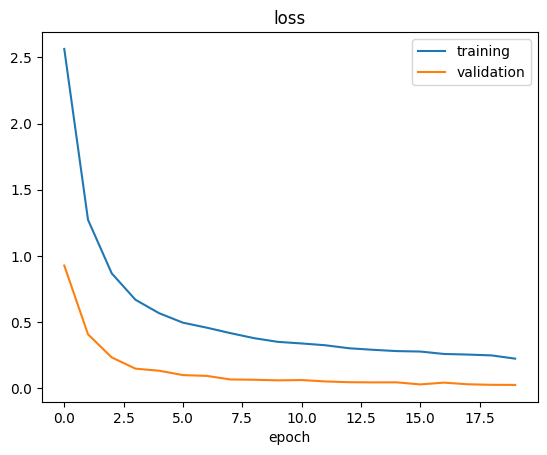

In [24]:
# Plotting results
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.show()

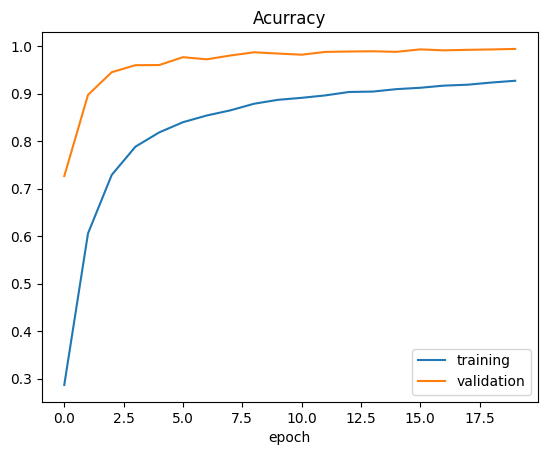

In [25]:
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

Test Score: 0.02336323820054531
Test Accuracy: 0.9933907985687256


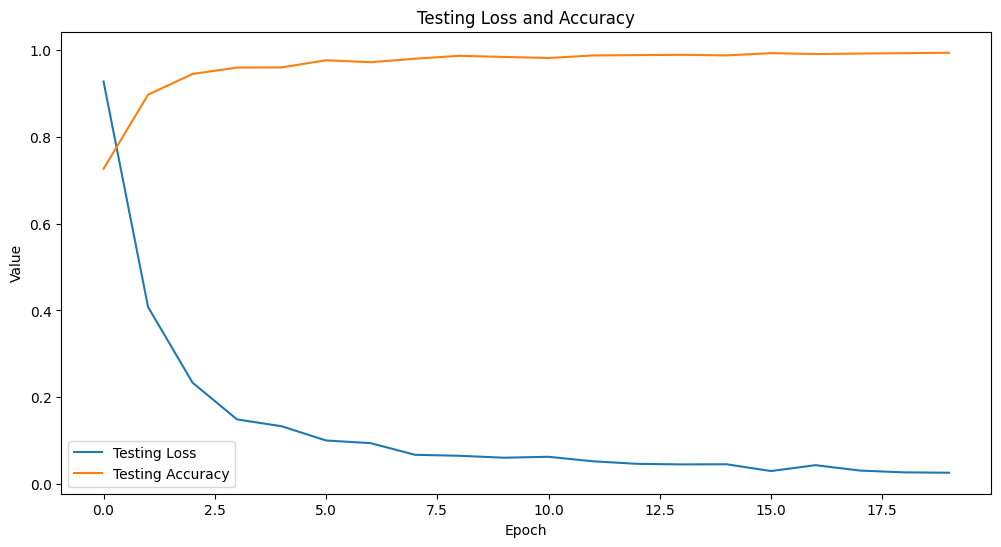

In [28]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

# Plot the testing loss and accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Testing Loss and Accuracy')
plt.legend()
plt.show()

### **Testing**

In [ ]:
labels = {0:'Speed limit(20km/h)',
          1:'Speed limit(30km/h)',
          2:'Speed limit(50km/h)',
          3:'Speed limit(60km/h)',
          4:'Speed limit(70km/h)',
          5:'Speed limit(80km/h)',
          6:'End of speed limit(80km/h)',
          7:'Speed limit(100km/h)',
          8:'Speed limit(120km/h)',
          9:'No passing',
          10:'No passing for vehicles over 3.5 metric tons',
          11:'Right-of-way at the next intersection',
          12:'Priority road',
          13:'Yield',
          14:'Stop',
          15:'No vehicles',
          16:'Vehicles over 3.5 metric tons prohibted',
          17:'No entry',
          18:'General caution',
          19:'Dangerous curve to the left',
          20:'Dangerous curve to the right',
          21:'Double curve',
          22:'Bumpy road',
          23:'Slippery road',
          24:'Road narrows on the right',
          25:'Road work',
          26:'Traffic signals',
          27:'Pedestrians',
          28:'Children crossing',
          29:'Bicycles crossing',
          30:'Beware of ice/snow',
          31:'Wild animals crossing',
          32:'End of all speed and passing limits',
          33:'Turn right ahead',
          34:'Turn left ahead',
          35:'Ahead only',
          36:'Go straight or right',
          37:'Go straight or left',
          38:'Keep right',
          39:'Keep left',
          40:'Roundabout mandatory',
          41:'End of no passing',
          42:'End of no passing by vehicles over 3.5 metric tons'}

327/327 [==============================] - 1s 2ms/step


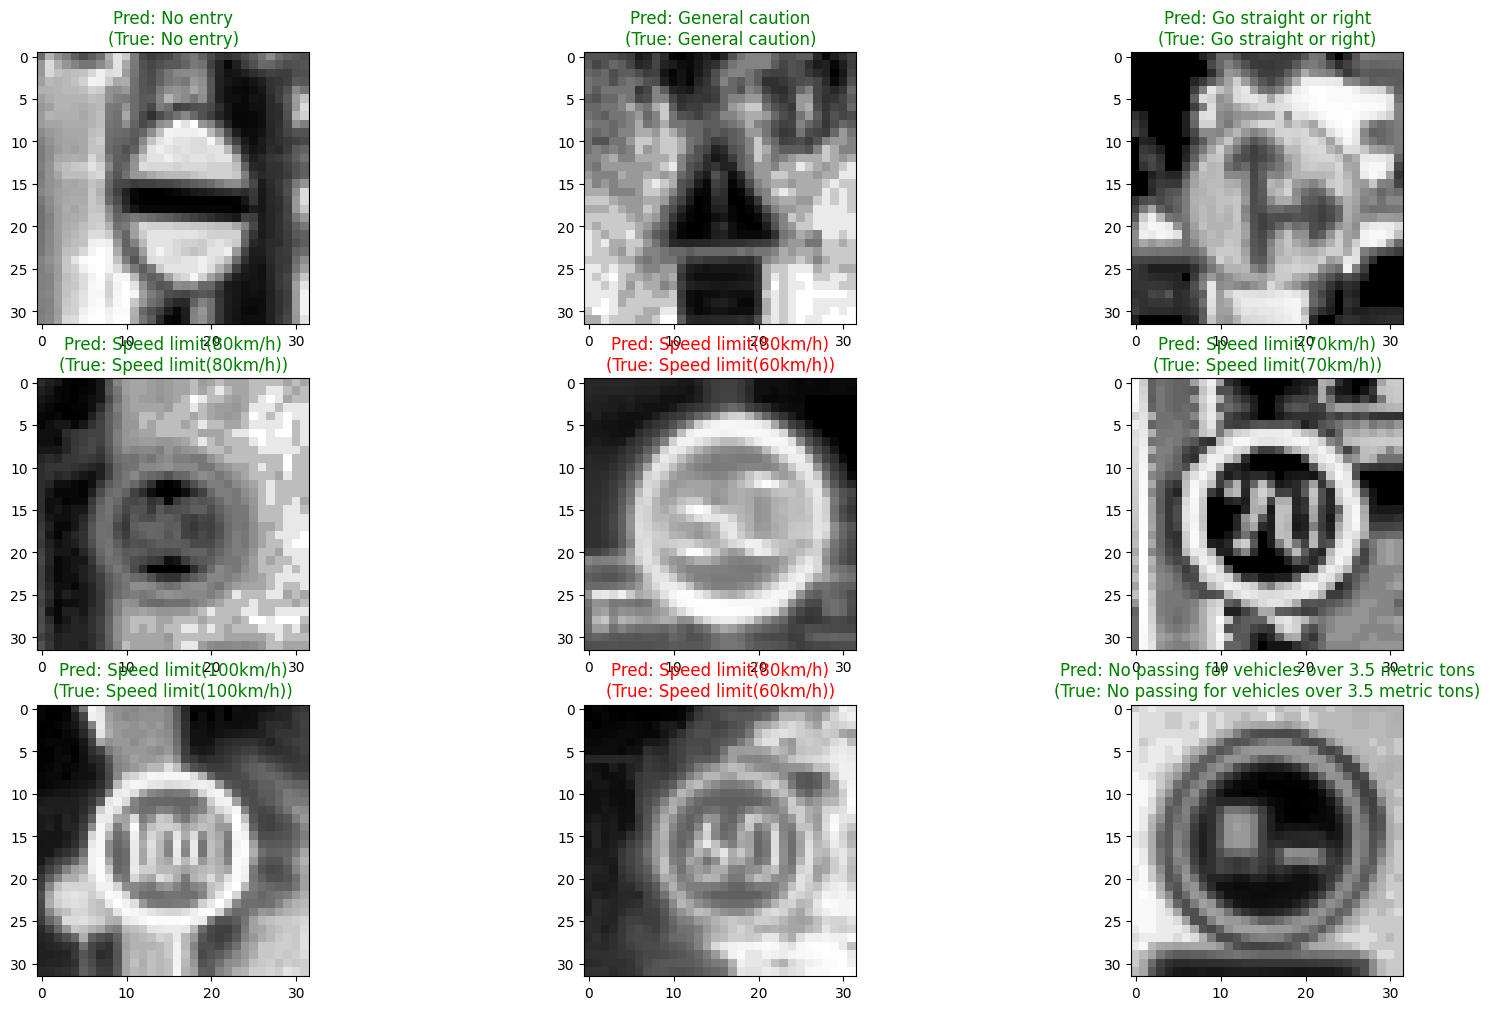

In [42]:
# Get 9 random numbers
rand_img = random.sample(range(len(X_test)), 9)

# Get the predicted labels for the test data
y_pred = model.predict(X_test)

# Plot the images and the predicted labels
fig, axs = plt.subplots(3, 3, figsize=(20, 12))
axs = axs.ravel()
for i in range(9):
  # Plot the image
  axs[i].imshow(X_test[rand_img[i]], cmap=plt.cm.binary)

  # Get the predicted and actual label indices
  pred_label = np.argmax(y_pred[rand_img[i]])
  true_label = np.argmax(y_test[rand_img[i]])

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
     color = "green"
  else:
     color = "red"

  # Set the label text
  axs[i].set_title("Pred: {}\n(True: {})".format(labels[pred_label],
                                                   labels[true_label]),
             color=color) # set the color to green or red
  axs[i].axis('off')
plt.show()

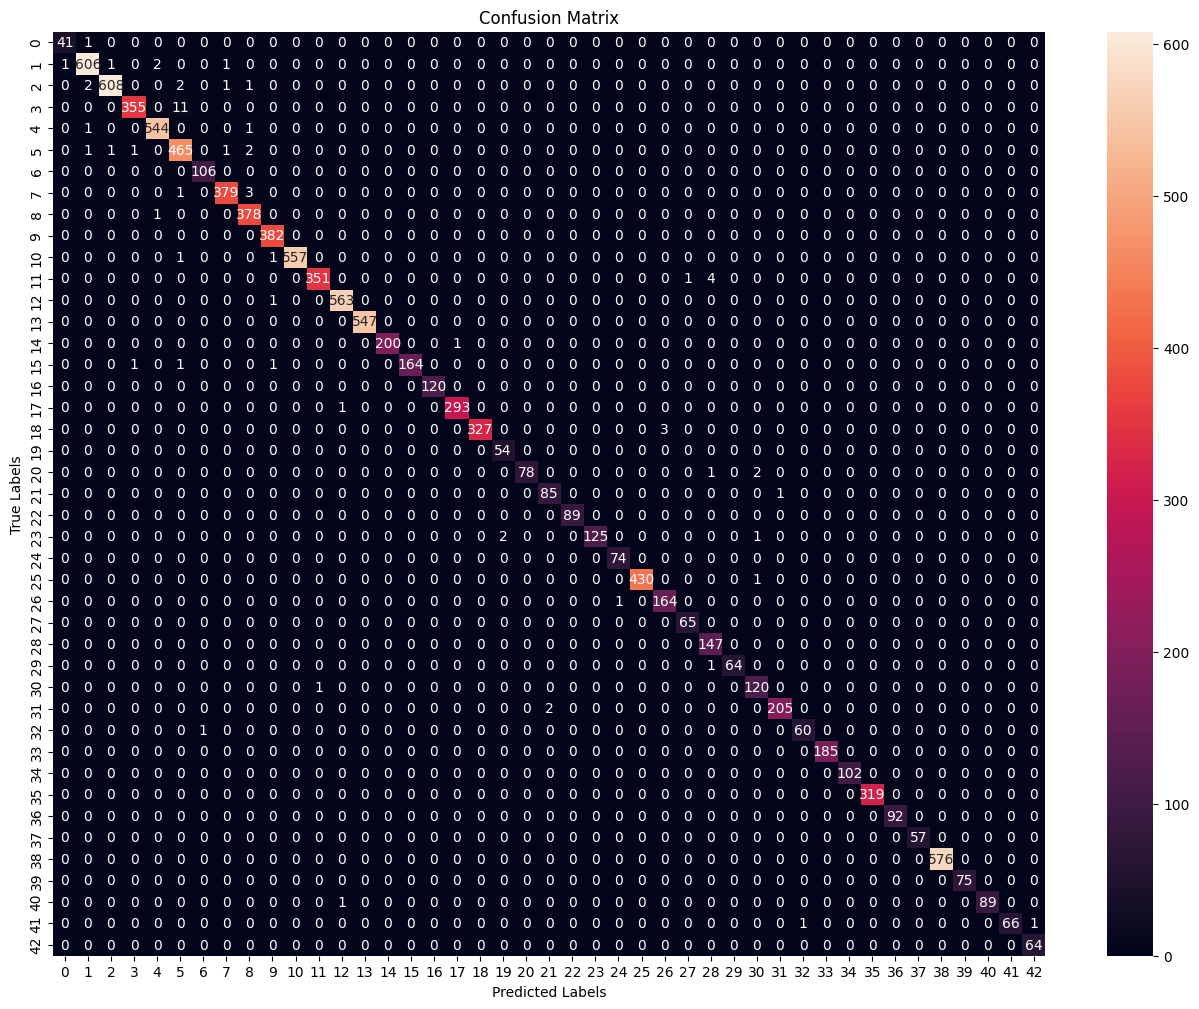

In [35]:
# Get the predicted labels for the test data
# y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_mtx,annot=True, fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### **Pickle**

In [ ]:
# STORE THE MODEL AS A PICKLE OBJECT
pickle_out= open("model_trained.h5","wb")  # wb = WRITE BYTE
pickle.dump(model,pickle_out)
pickle_out.close()


In [36]:
model.save('my_model.h5') 